## 신경망 실습

=== 초기 입력값 ===
입력: x1 = 1.0, x2 = 2.0

=== 입력층 → 히든층 ===
입력값: x1 = 1.0, x2 = 2.0
가중치 (fc1): 
[[0.5 0.3]
 [0.2 0.4]
 [0.1 0.5]]
편향 (fc1): [0.1 0.2 0.3]
선형 변환 결과 (z1 = Wx + b): [1.2       1.2       1.4000001]
ReLU 적용 후 (a1): [1.2       1.2       1.4000001]
ReLU 활성화 여부: ['✅', '✅', '✅']

=== 히든층 → 출력층 ===
입력값 (히든층 출력): [1.2       1.2       1.4000001]
가중치 (fc2): 
[[0.4 0.3 0.2]]
편향 (fc2): [0.1]
선형 변환 결과 (z2 = Wx + b): [1.2200001]
Sigmoid 적용 후 (a2): [0.77206355]
Sigmoid 활성화 여부 (threshold 0.5): ['✅']


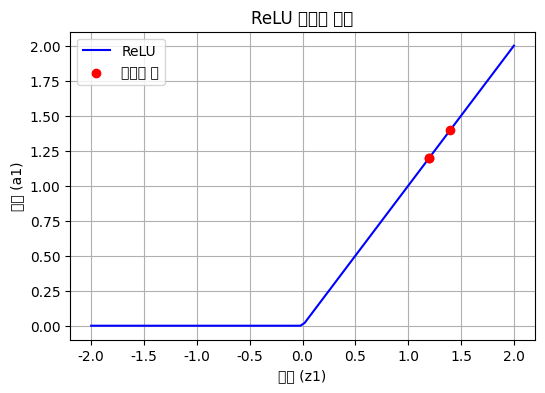

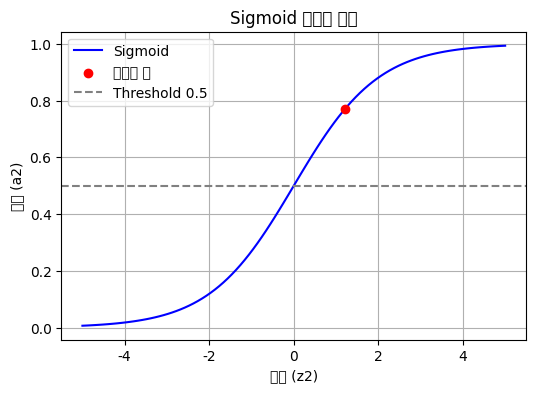


=== 최종 출력 ===
최종 출력: [0.77206355]


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 경고 억제
warnings.filterwarnings("ignore", category=UserWarning)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'  # NanumGothic 없으므로 기본 폰트 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 간단한 신경망 정의
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 3)  # 입력층(2) → 히든층(3)
        self.fc2 = nn.Linear(3, 1)  # 히든층(3) → 출력층(1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        # 가중치와 편향 초기화
        with torch.no_grad():
            self.fc1.weight = nn.Parameter(torch.tensor([[0.5, 0.3], [0.2, 0.4], [0.1, 0.5]]))
            self.fc1.bias = nn.Parameter(torch.tensor([0.1, 0.2, 0.3]))
            self.fc2.weight = nn.Parameter(torch.tensor([[0.4, 0.3, 0.2]]))
            self.fc2.bias = nn.Parameter(torch.tensor([0.1]))

    def forward(self, x):
        # 입력층 → 히든층
        print("\n=== 입력층 → 히든층 ===")
        print(f"입력값: x1 = {x[0,0]:.1f}, x2 = {x[0,1]:.1f}")
        print(f"가중치 (fc1): \n{self.fc1.weight.detach().numpy()}")
        print(f"편향 (fc1): {self.fc1.bias.detach().numpy()}")
        z1 = self.fc1(x)
        print(f"선형 변환 결과 (z1 = Wx + b): {z1.detach().numpy().flatten()}")
        a1 = self.relu(z1)
        print(f"ReLU 적용 후 (a1): {a1.detach().numpy().flatten()}")
        relu_status = ["✅" if val > 0 else "❌" for val in z1.detach().numpy().flatten()]
        print(f"ReLU 활성화 여부: {relu_status}")

        # 히든층 → 출력층
        print("\n=== 히든층 → 출력층 ===")
        print(f"입력값 (히든층 출력): {a1.detach().numpy().flatten()}")
        print(f"가중치 (fc2): \n{self.fc2.weight.detach().numpy()}")
        print(f"편향 (fc2): {self.fc2.bias.detach().numpy()}")
        z2 = self.fc2(a1)
        print(f"선형 변환 결과 (z2 = Wx + b): {z2.detach().numpy().flatten()}")
        a2 = self.sigmoid(z2)
        print(f"Sigmoid 적용 후 (a2): {a2.detach().numpy().flatten()}")
        sigmoid_status = ["✅" if val > 0.5 else "❌" for val in a2.detach().numpy().flatten()]
        print(f"Sigmoid 활성화 여부 (threshold 0.5): {sigmoid_status}")

        return z1, a1, z2, a2

# 활성화 함수 그래프
def plot_activation_functions(z1, a1, z2, a2):
    # ReLU 그래프
    x_relu = np.linspace(-2, 2, 100)
    y_relu = np.maximum(0, x_relu)
    plt.figure(figsize=(6, 4))
    plt.plot(x_relu, y_relu, label='ReLU', color='blue')
    plt.scatter(z1.detach().numpy().flatten(), a1.detach().numpy().flatten(),
               color='red', label='히든층 값', zorder=5)
    plt.title("ReLU 활성화 함수")
    plt.xlabel("입력 (z1)")
    plt.ylabel("출력 (a1)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Sigmoid 그래프
    x_sigmoid = np.linspace(-5, 5, 100)
    y_sigmoid = 1 / (1 + np.exp(-x_sigmoid))
    plt.figure(figsize=(6, 4))
    plt.plot(x_sigmoid, y_sigmoid, label='Sigmoid', color='blue')
    plt.scatter(z2.detach().numpy().flatten(), a2.detach().numpy().flatten(),
               color='red', label='출력층 값', zorder=5)
    plt.axhline(0.5, color='gray', linestyle='--', label='Threshold 0.5')
    plt.title("Sigmoid 활성화 함수")
    plt.xlabel("입력 (z2)")
    plt.ylabel("출력 (a2)")
    plt.legend()
    plt.grid(True)
    plt.show()

# 모델 초기화 및 입력 데이터 준비
model = SimpleNet()
x = torch.tensor([[1.0, 2.0]], requires_grad=True)
print("=== 초기 입력값 ===")
print(f"입력: x1 = {x[0,0]:.1f}, x2 = {x[0,1]:.1f}")

# 순전파 실행
z1, a1, z2, a2 = model(x)

# 활성화 함수 그래프 표시
plot_activation_functions(z1, a1, z2, a2)

print("\n=== 최종 출력 ===")
print(f"최종 출력: {a2.detach().numpy().flatten()}")

## 활성화함수 실습

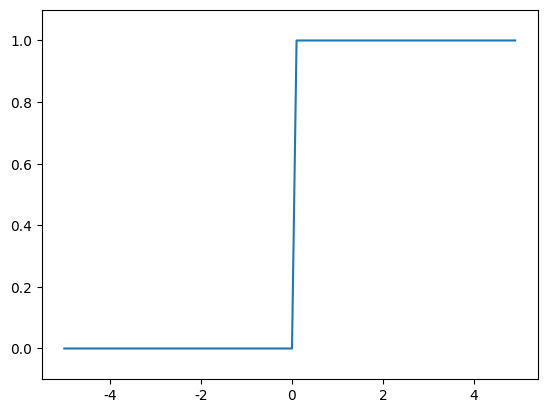

In [13]:
import numpy as np
import matplotlib.pylab as pit

def step_function(x):
    return np.array(x > 0, dtype=int)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정 
pit.show()



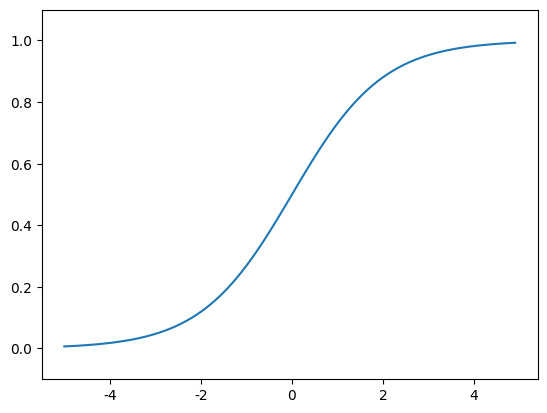

In [17]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x) 
# sigmoid() 함수로 변경
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정 
plt.show()

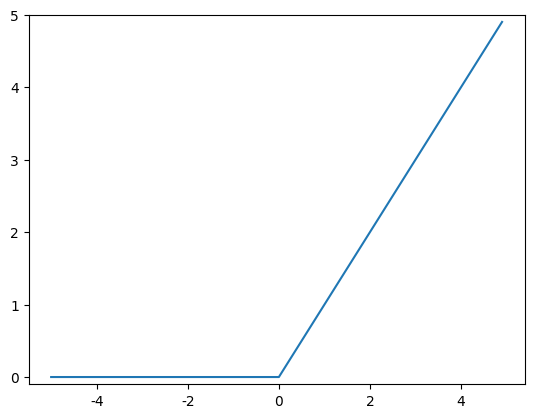

In [2]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x) 

plt.plot(x, y)
plt.ylim(-0.1, 5.0) # y축 범위 지정 
plt.show()